  # Lineer Regresyon
**Bir kişinin yaşı, boyu, önümüzdeki senenin dolar kuru, seneye bilgisayar fiyatları vb. numerik verileri bulmaya tahmin; 
    bir kişinin cinsiyeti, arabasının rengi vb. kategorik verilerin bulunmasına ise sınıflandırma denir.**
Öngörü ile tahminin farkı: tahmin geçmiş verilerin tahminini de içerir ancak öngörü, daha önce hiç ulaşamadığımız
    verilerin tahminini içeriyor.

In [136]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

In [137]:
data = pd.read_csv("aylaragoresatis.csv")

**Basit Doğrusal Regresyon = y = ax + b(basit doğru formülü) a=eğim, b=doğrunun ne kadar kaydırılacağı...**

**Verilen verilere en yakın doğruyu çizmek ve hatayı minimuma indirmek bizim amacımız(hata = değer ile doğru arasındaki mesafe)**

$y=a*x+b$

In [138]:
aylar = data.iloc[:, 0:1]#bağımsız değişken
satislar = data.iloc[:,1:2]#bağımlı değişken

#x'ler ve y'lerden rastgele seçip train ve test kümesi olmak üzere ikiye ayırdık, verileri böldük 
x_train, x_test, y_train, y_test = train_test_split(aylar, satislar, test_size=0.33, random_state=0)
print("Train\n", x_train)
print("\n\n", y_train)
print("\n\nTest\n", x_test)
print("\n\n", y_test)

Train
     Aylar
5      19
16     32
8      20
14     29
23     50
20     42
1      10
29     65
6      19
4      14
18     37
19     37
9      24
7      20
25     55
3      13
0       8
21     44
15     31
12     25


     Satislar
5    28321.0
16   33014.5
8    32222.5
14   30555.5
23   56906.0
20   45869.0
1    23102.5
29   60936.0
6    30075.0
4    19945.5
18   40681.5
19   46970.0
9    28594.5
7    27222.5
25   52791.0
3    21762.5
0    19671.5
21   49136.5
15   33969.0
12   28478.5


Test
     Aylar
2      11
28     64
13     26
10     25
26     59
24     54
27     59
11     25
17     34
22     49


     Satislar
2    18865.5
28   61195.5
13   28540.5
10   31609.0
26   58484.5
24   54715.5
27   56317.5
11   27897.0
17   41544.0
22   50651.0


In [139]:
#x_traini ve x_test'i standartlaştırdık. Yani kullanabileceğimiz, birbirlerine yakın veriler haline getirdik.
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)
Y_train = sc.fit_transform(y_train)
Y_test = sc.fit_transform(y_test)
print("x_train standartlaştırma\n", X_train)
print("\n\nx_test standartlaştırma\n", X_test)
print("\n\n", Y_test)
print("\n\n", Y_train)

x_train standartlaştırma
 [[-0.70368853]
 [ 0.15126015]
 [-0.63792324]
 [-0.0460357 ]
 [ 1.33503524]
 [ 0.80891298]
 [-1.29557607]
 [ 2.32151449]
 [-0.70368853]
 [-1.03251494]
 [ 0.48008657]
 [ 0.48008657]
 [-0.37486211]
 [-0.63792324]
 [ 1.66386166]
 [-1.09828023]
 [-1.42710664]
 [ 0.94044355]
 [ 0.08549487]
 [-0.30909683]]


x_test standartlaştırma
 [[-1.68268756]
 [ 1.33023274]
 [-0.82997427]
 [-0.88682182]
 [ 1.04599497]
 [ 0.76175721]
 [ 1.04599497]
 [-0.88682182]
 [-0.37519385]
 [ 0.47751944]]


 [[-1.66597621]
 [ 1.25819492]
 [-0.99762385]
 [-0.7856508 ]
 [ 1.0709181 ]
 [ 0.81055426]
 [ 0.92122098]
 [-1.04207705]
 [-0.09933754]
 [ 0.52977719]]


 [[-0.58893482]
 [-0.20450235]
 [-0.26937302]
 [-0.40591269]
 [ 1.75238875]
 [ 0.84837657]
 [-1.01636869]
 [ 2.08247565]
 [-0.44526921]
 [-1.27495041]
 [ 0.42348183]
 [ 0.93855664]
 [-0.56653314]
 [-0.67891012]
 [ 1.41533972]
 [-1.12612463]
 [-1.29739304]
 [ 1.11600906]
 [-0.12632172]
 [-0.5760344 ]]


# Basit Doğrusal Regresyon Model İnşası
**şu an xtrainlerden ytrainleri seçmeye çalışacağız. Yani aylarla satışları karşılaştıracak ve doğrusal bir bağlantı bulmaya çalışacak**
**Amacımız ise x_testlerden ayları al ve o ayda kaç satış olduğunu tahmin etmeye çalış. y_testlere ne kadar yakın karşılaştır.**

In [140]:
lr = LinearRegression()
lr.fit(x_train, y_train)#bu değerleri alarak bir model inşa et


LinearRegression()

                                            **Uygulama**
                                            
**y_test'i görmeden üst blokta yaptığımız fit sayesinde x_test'lere karşılık gelen y_test değerlerini bulmaya çalışıyoruz.**
**Tahminleri Scaling olarak da görebiliriz(X_test, Y_test olarak) ancak farkı daha rahat anlamamız için x_test ve y_test'e bakıyoruz**

In [141]:
predict = lr.predict(x_test)
print(predict)
print("\n", y_test)

[[20991.93663769]
 [62142.93172873]
 [32638.44468232]
 [31862.01081268]
 [58260.76238052]
 [54378.59303231]
 [58260.76238052]
 [31862.01081268]
 [38849.91563946]
 [50496.4236841 ]]

     Satislar
2    18865.5
28   61195.5
13   28540.5
10   31609.0
26   58484.5
24   54715.5
27   56317.5
11   27897.0
17   41544.0
22   50651.0


# Görselleştirme
**Verilerde sürekli artan bir izlenim alamayız. Bazen artıyor bazen de azalıyor!!**

Text(0, 0.5, 'Satışlar')

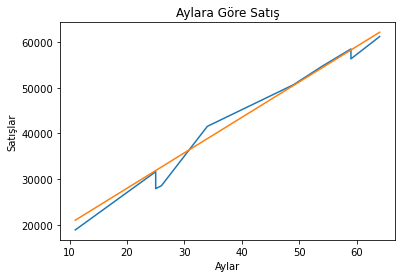

In [142]:
#bunu yapmamamız gerekir. Çünkü çok saçma bir çıktı verir. Önce düzeltmeliyiz.
#nedeni ise biz bu verileri random ekledik(train verilerini) bu yüzden veriler sıralı değil!
#plt.plot(x_train, y_train) 
#sort_index ile değerleri indexlerine göre sıralayabiliriz.
x_test = x_test.sort_index()
y_test = y_test.sort_index()
plt.plot(x_test, y_test)
#burada doğru çizimi yapıyoruz, xtest'in tahminine göre. Ancak zıplamalar olsa bile(ve bir bu değerler sıralamamıza rağmen)
#doğru şekline çizim yapıyor!
#Bu sayede aradaki hata payını görebiliriz.
plt.plot(x_test, lr.predict(x_test))
plt.title("Aylara Göre Satış")
plt.xlabel("Aylar")
plt.ylabel("Satışlar")
